In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import keras
from keras.models import Sequential
from keras.layers import Flatten
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier

from sklearn.metrics import confusion_matrix , classification_report

In [2]:
#read mnist fashion dataset
mnist = keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


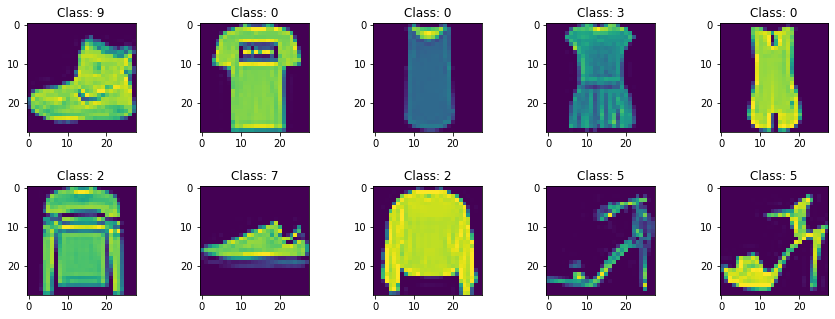

In [4]:
fig, axes = plt.subplots(nrows=2, ncols=5,figsize=(15,5))          
ax = axes.ravel()
for i in range(10):
    ax[i].imshow(X_train[i].reshape(28,28))
    ax[i].title.set_text('Class: ' + str(y_train[i]))              
plt.subplots_adjust(hspace=0.5)                                    
plt.show()

In [5]:
#reshape data from 3-D to 2-D array
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)

#feature scaling
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()

#fit and transform training dataset
X_train = minmax.fit_transform(X_train)

#transform testing dataset
X_test = minmax.transform(X_test)
print('Number of unique classes: ', len(np.unique(y_train)))
print('Classes: ', np.unique(y_train))

Number of unique classes:  10
Classes:  [0 1 2 3 4 5 6 7 8 9]


In [6]:
#initializing model
model = Sequential()
#add 1st hidden layer
model.add(Dense(input_dim = X_train.shape[1], units = 256, kernel_initializer='uniform', activation='relu'))
#add output layer
model.add(Dense(units = 10, kernel_initializer='uniform', activation='softmax'))
#compile the neural network
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


In [7]:
#fit training dataset into the model
model.fit(X_train, y_train, epochs=25, verbose=1)

Epoch 1/25
1875/1875 [==============================] - 2s 901us/step - loss: 0.5005 - accuracy: 0.8234
Epoch 2/25
1875/1875 [==============================] - 2s 862us/step - loss: 0.3655 - accuracy: 0.8681
Epoch 3/25
1875/1875 [==============================] - 2s 836us/step - loss: 0.3272 - accuracy: 0.8800
Epoch 4/25
1875/1875 [==============================] - 2s 858us/step - loss: 0.3028 - accuracy: 0.8876
Epoch 5/25
1875/1875 [==============================] - 2s 821us/step - loss: 0.2839 - accuracy: 0.8946
Epoch 6/25
1875/1875 [==============================] - 2s 814us/step - loss: 0.2682 - accuracy: 0.8993
Epoch 7/25
1875/1875 [==============================] - 2s 826us/step - loss: 0.2555 - accuracy: 0.9042
Epoch 8/25
1875/1875 [==============================] - 2s 822us/step - loss: 0.2453 - accuracy: 0.9083
Epoch 9/25
1875/1875 [==============================] - 2s 809us/step - loss: 0.2359 - accuracy: 0.9115
Epoch 10/25
1875/1875 [==============================] - 2s 833u

In [8]:
#Evaluating fashion MNIST test accuracy
test_loss_fashion, test_acc_fashion = model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 580us/step - loss: 0.3961 - accuracy: 0.8906


In [9]:
y_pred = model.predict(X_test)

In [10]:
y_pred

array([[6.48777088e-10, 1.50432221e-14, 8.81934120e-13, ...,
        5.64149290e-04, 3.84818288e-10, 9.99433219e-01],
       [1.01645776e-06, 5.40612078e-18, 9.99285877e-01, ...,
        1.42187835e-27, 4.79464191e-17, 6.60838752e-21],
       [1.55630142e-19, 1.00000000e+00, 6.99476665e-18, ...,
        0.00000000e+00, 2.02449227e-29, 7.21533413e-36],
       ...,
       [1.88658290e-12, 1.88324701e-19, 1.10771396e-12, ...,
        7.68383821e-16, 1.00000000e+00, 2.97780578e-22],
       [1.04875834e-16, 1.00000000e+00, 2.17225435e-13, ...,
        4.94836499e-28, 8.29966165e-15, 7.33074480e-22],
       [8.42879377e-11, 1.05598349e-19, 1.80630830e-10, ...,
        8.38269273e-07, 2.32134425e-06, 2.87234153e-10]], dtype=float32)

In [21]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [18]:
y_pred=np.argmax(y_pred, axis=1)

In [22]:
y_pred

array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

In [23]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85      1000
           1       0.99      0.97      0.98      1000
           2       0.82      0.79      0.80      1000
           3       0.89      0.89      0.89      1000
           4       0.76      0.87      0.81      1000
           5       0.99      0.96      0.97      1000
           6       0.76      0.66      0.71      1000
           7       0.94      0.97      0.95      1000
           8       0.98      0.98      0.98      1000
           9       0.96      0.96      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



In [11]:
import seaborn as sns

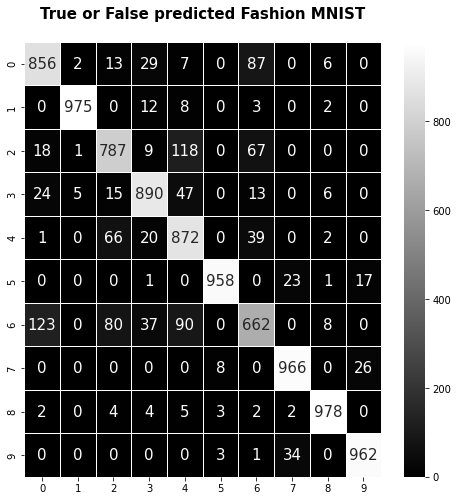

<Figure size 432x288 with 0 Axes>

In [30]:
#Confusion matrix for Fashion MNIST
con_mat=confusion_matrix(y_test,y_pred)
plt.style.use('seaborn-deep')
plt.figure(figsize=(8,8))
sns.heatmap(con_mat,annot=True,annot_kws={'size': 15},linewidths=0.5,fmt="d",cmap="gray")
plt.title('True or False predicted Fashion MNIST\n',fontweight='bold',fontsize=15)
plt.show()

results_path = 'results_classification.png'
#print(results_path)
plt.savefig(results_path, dpi=400)

In [25]:
results_path = 'results_classification.png'
#print(results_path)
plt.savefig(results_path, dpi=400)

<Figure size 432x288 with 0 Axes>